In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, time, json
import pandas as pd
from openai import OpenAI
from tqdm.auto import tqdm
import spacy

import sys
sys.path.append("../../")
import os

import logging
from src.utils import logging_utils
from src.utils import env_utils
from src import functional
from datasets import load_dataset

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}")
logger.info(f"{transformers.__version__=}")

/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-08-15 13:05:28 __main__ INFO     torch.__version__='2.3.1', torch.version.cuda='12.1'
2024-08-15 13:05:28 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=1, torch.cuda.get_device_name()='NVIDIA RTX A6000'
2024-08-15 13:05:28 __main__ INFO     transformers.__version__='4.43.3'


2024-08-15 13:50:13 src.utils.experiment_utils INFO     setting all seeds to 123
2024-08-15 13:50:13 __main__ INFO     layer_name='model.layers.0'


100%|██████████| 400/400 [00:10<00:00, 39.26it/s]

2024-08-15 13:50:23 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:05<00:00, 73.62it/s] 


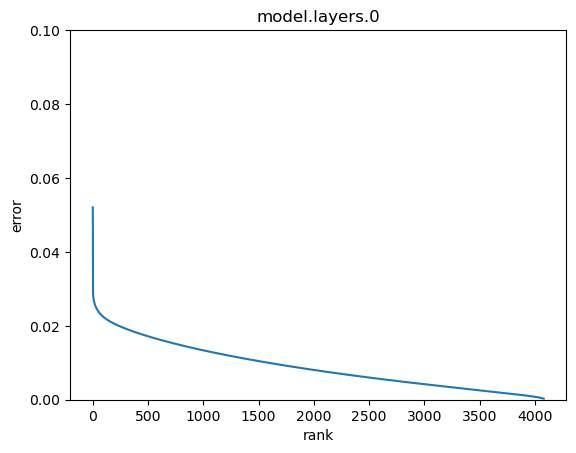

2024-08-15 13:50:33 __main__ INFO     layer_name='model.layers.1'


100%|██████████| 400/400 [00:10<00:00, 39.41it/s]

2024-08-15 13:50:43 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:05<00:00, 73.13it/s] 


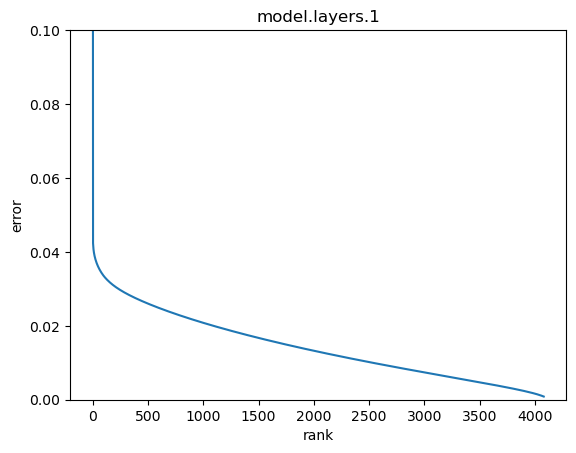

2024-08-15 13:50:52 __main__ INFO     layer_name='model.layers.2'


100%|██████████| 400/400 [00:10<00:00, 39.49it/s]

2024-08-15 13:51:02 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.40it/s] 


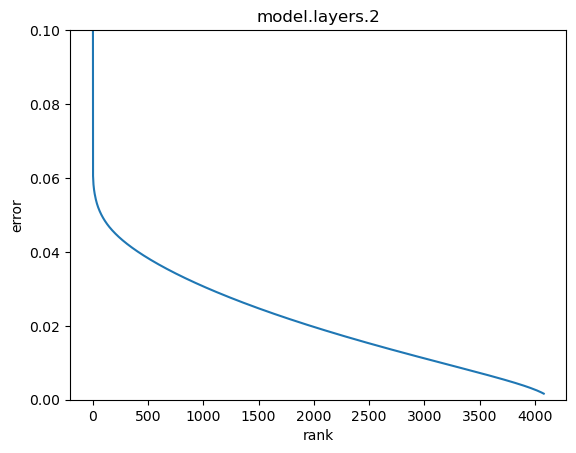

2024-08-15 13:51:11 __main__ INFO     layer_name='model.layers.3'


100%|██████████| 400/400 [00:10<00:00, 39.42it/s]

2024-08-15 13:51:22 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.22it/s] 


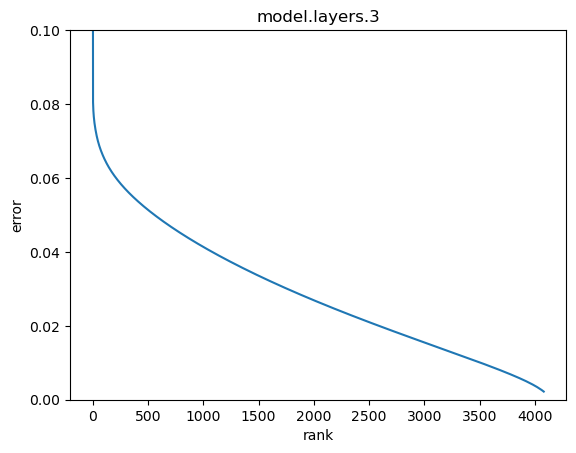

2024-08-15 13:51:31 __main__ INFO     layer_name='model.layers.4'


100%|██████████| 400/400 [00:10<00:00, 39.31it/s]

2024-08-15 13:51:41 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.07it/s] 


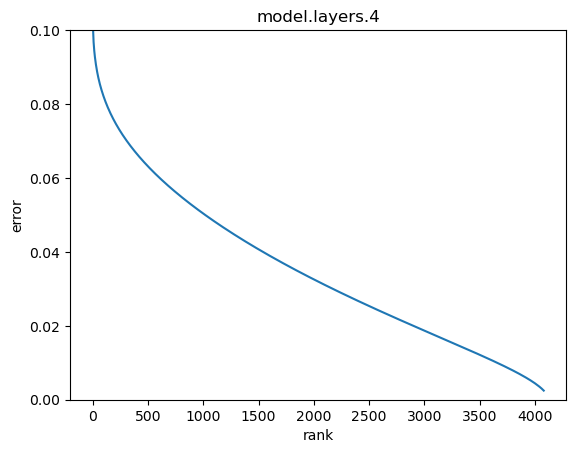

2024-08-15 13:51:50 __main__ INFO     layer_name='model.layers.5'


100%|██████████| 400/400 [00:10<00:00, 39.32it/s]

2024-08-15 13:52:01 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.13it/s] 


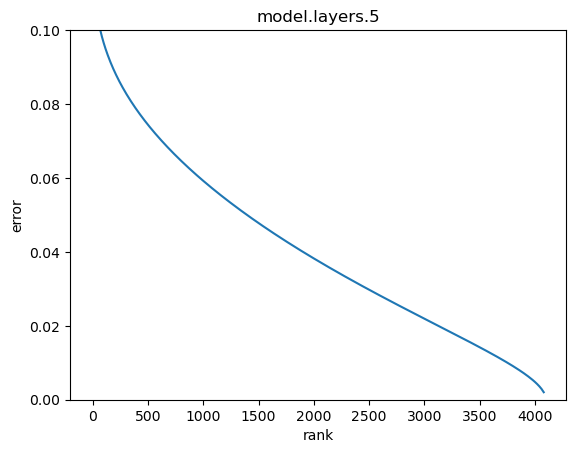

2024-08-15 13:52:10 __main__ INFO     layer_name='model.layers.6'


100%|██████████| 400/400 [00:10<00:00, 39.35it/s]

2024-08-15 13:52:20 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.90it/s] 


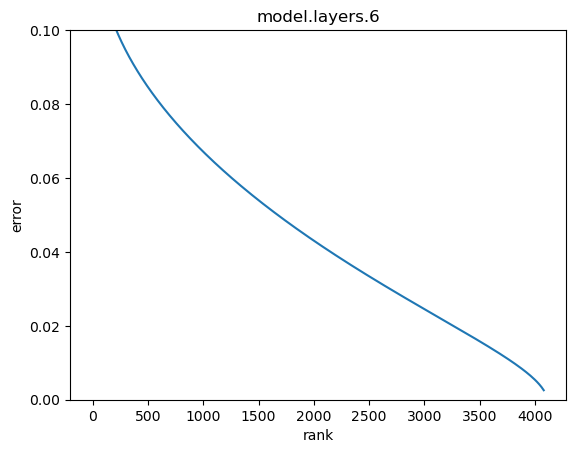

2024-08-15 13:52:29 __main__ INFO     layer_name='model.layers.7'


100%|██████████| 400/400 [00:10<00:00, 39.37it/s]

2024-08-15 13:52:40 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.99it/s] 


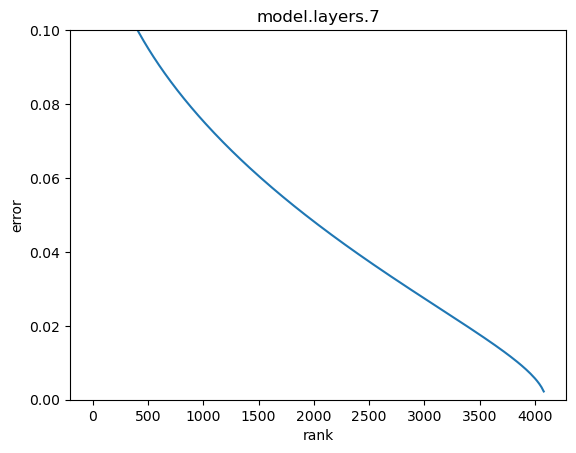

2024-08-15 13:52:49 __main__ INFO     layer_name='model.layers.8'


100%|██████████| 400/400 [00:10<00:00, 39.44it/s]

2024-08-15 13:52:59 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.60it/s] 


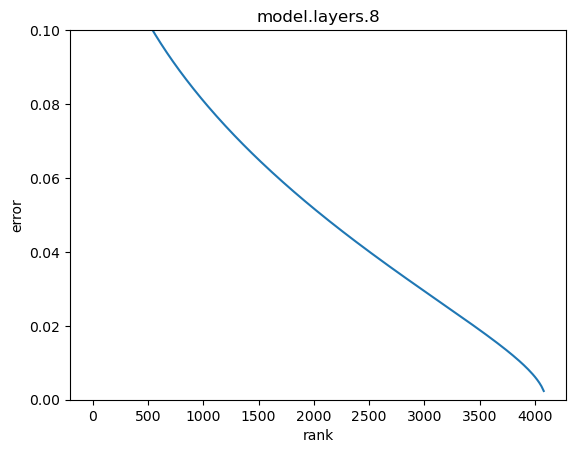

2024-08-15 13:53:09 __main__ INFO     layer_name='model.layers.9'


100%|██████████| 400/400 [00:10<00:00, 38.64it/s]


2024-08-15 13:53:19 __main__ INFO     torch.Size([4096, 5679])


100%|██████████| 435/435 [00:06<00:00, 71.65it/s] 


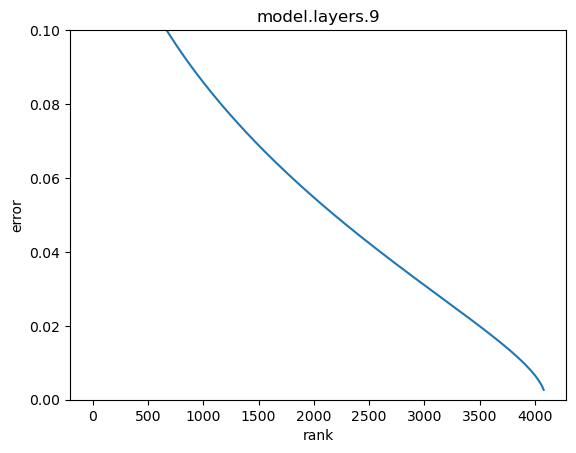

2024-08-15 13:53:28 __main__ INFO     layer_name='model.layers.10'


100%|██████████| 400/400 [00:10<00:00, 39.64it/s]

2024-08-15 13:53:38 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.67it/s] 


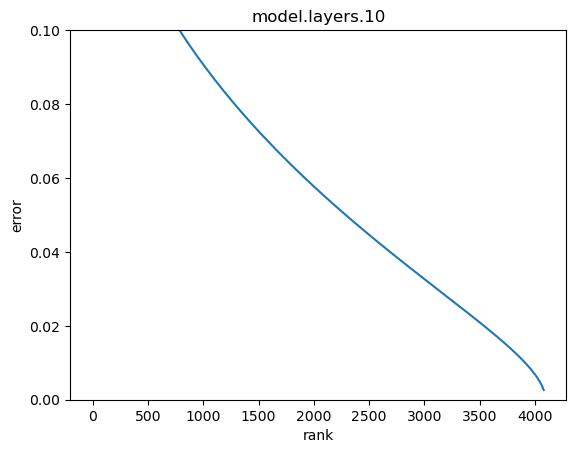

2024-08-15 13:53:48 __main__ INFO     layer_name='model.layers.11'


100%|██████████| 400/400 [00:10<00:00, 38.32it/s]

2024-08-15 13:53:58 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.66it/s] 


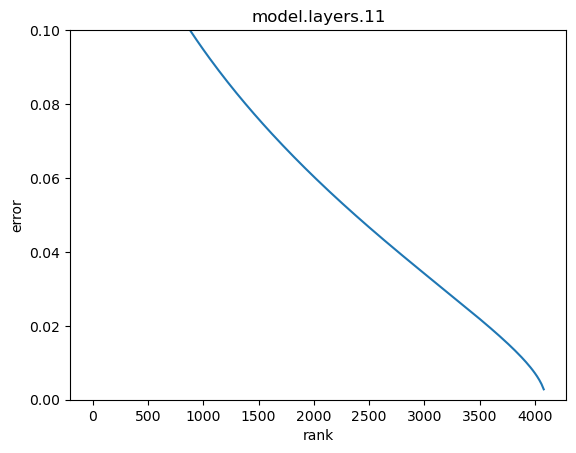

2024-08-15 13:54:08 __main__ INFO     layer_name='model.layers.12'


100%|██████████| 400/400 [00:10<00:00, 38.63it/s]

2024-08-15 13:54:18 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.61it/s] 


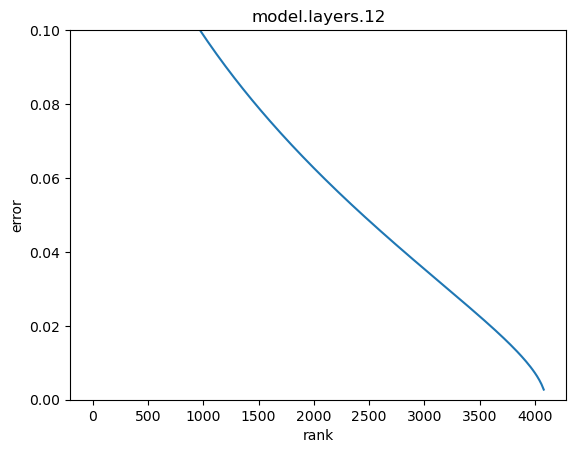

2024-08-15 13:54:27 __main__ INFO     layer_name='model.layers.13'


100%|██████████| 400/400 [00:10<00:00, 38.81it/s]

2024-08-15 13:54:38 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.67it/s] 


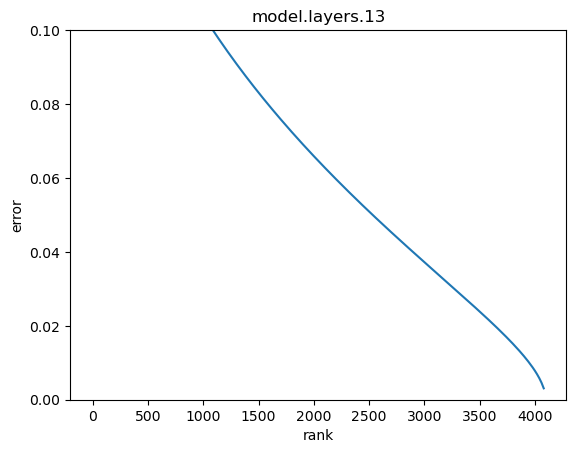

2024-08-15 13:54:47 __main__ INFO     layer_name='model.layers.14'


100%|██████████| 400/400 [00:10<00:00, 38.58it/s]


2024-08-15 13:54:58 __main__ INFO     torch.Size([4096, 5679])


100%|██████████| 435/435 [00:06<00:00, 71.92it/s] 


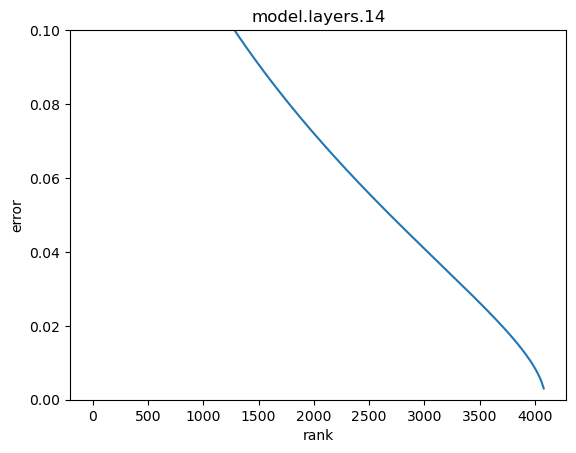

2024-08-15 13:55:07 __main__ INFO     layer_name='model.layers.15'


100%|██████████| 400/400 [00:10<00:00, 39.05it/s]

2024-08-15 13:55:17 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.79it/s] 


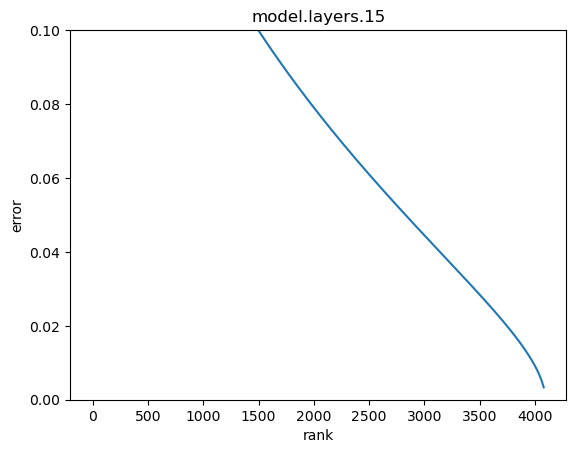

2024-08-15 13:55:26 __main__ INFO     layer_name='model.layers.16'


100%|██████████| 400/400 [00:10<00:00, 39.26it/s]

2024-08-15 13:55:37 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.98it/s] 


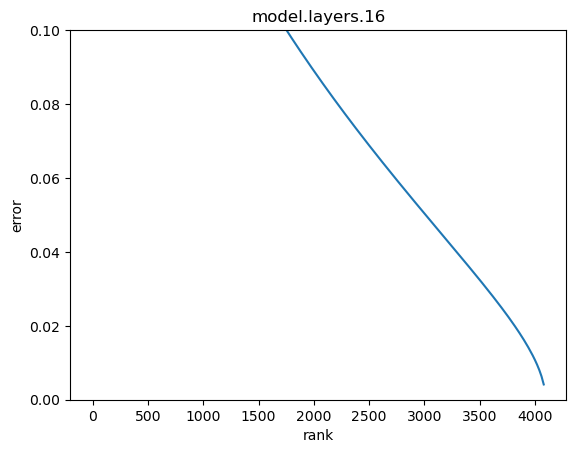

2024-08-15 13:55:46 __main__ INFO     layer_name='model.layers.17'


100%|██████████| 400/400 [00:10<00:00, 39.41it/s]

2024-08-15 13:55:56 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.62it/s] 


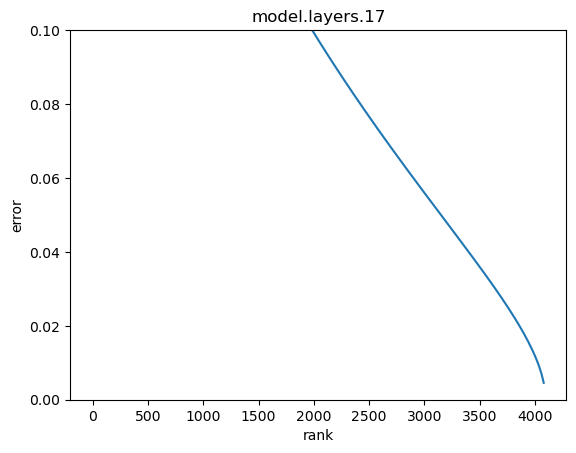

2024-08-15 13:56:06 __main__ INFO     layer_name='model.layers.18'


100%|██████████| 400/400 [00:10<00:00, 39.36it/s]

2024-08-15 13:56:16 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.14it/s] 


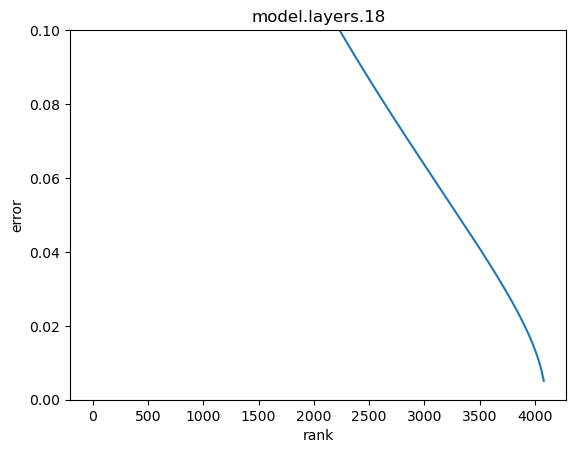

2024-08-15 13:56:25 __main__ INFO     layer_name='model.layers.19'


100%|██████████| 400/400 [00:10<00:00, 39.39it/s]

2024-08-15 13:56:35 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.89it/s] 


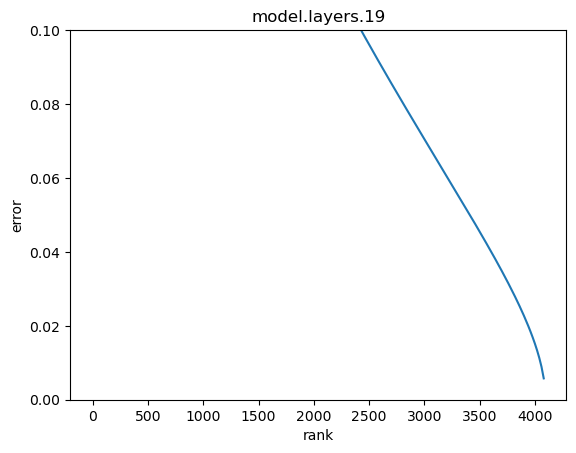

2024-08-15 13:56:45 __main__ INFO     layer_name='model.layers.20'


100%|██████████| 400/400 [00:10<00:00, 39.36it/s]

2024-08-15 13:56:55 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 71.82it/s] 


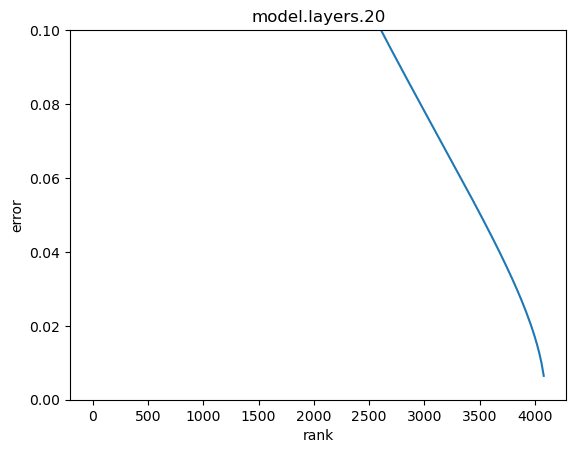

2024-08-15 13:57:04 __main__ INFO     layer_name='model.layers.21'


100%|██████████| 400/400 [00:10<00:00, 39.23it/s]

2024-08-15 13:57:14 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.02it/s] 


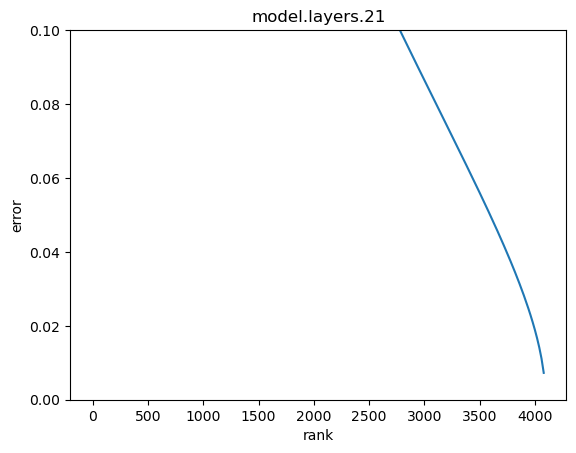

2024-08-15 13:57:24 __main__ INFO     layer_name='model.layers.22'


100%|██████████| 400/400 [00:10<00:00, 38.74it/s]


2024-08-15 13:57:34 __main__ INFO     torch.Size([4096, 5679])


100%|██████████| 435/435 [00:06<00:00, 72.20it/s] 


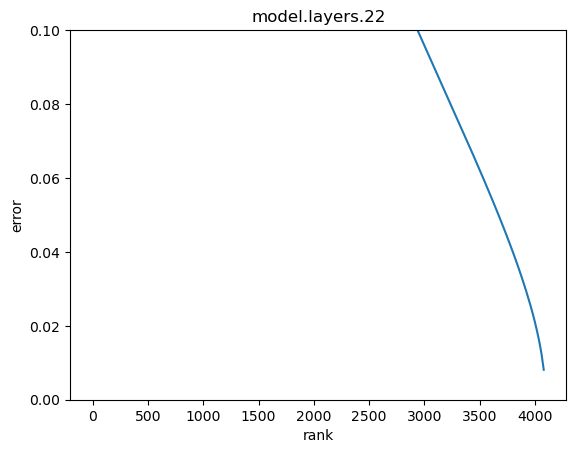

2024-08-15 13:57:43 __main__ INFO     layer_name='model.layers.23'


100%|██████████| 400/400 [00:10<00:00, 38.56it/s]

2024-08-15 13:57:54 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.26it/s] 


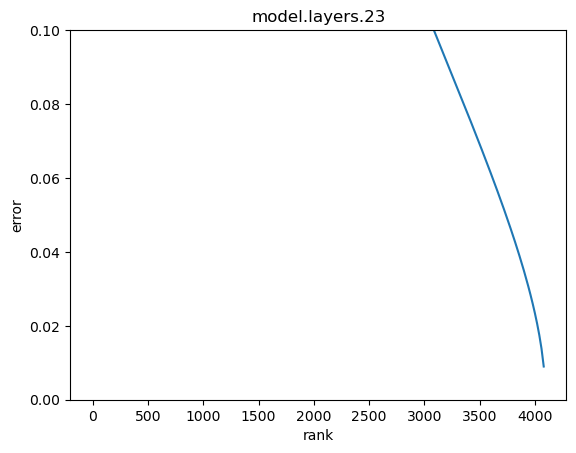

2024-08-15 13:58:03 __main__ INFO     layer_name='model.layers.24'


100%|██████████| 400/400 [00:10<00:00, 38.60it/s]


2024-08-15 13:58:14 __main__ INFO     torch.Size([4096, 5679])


100%|██████████| 435/435 [00:06<00:00, 72.22it/s] 


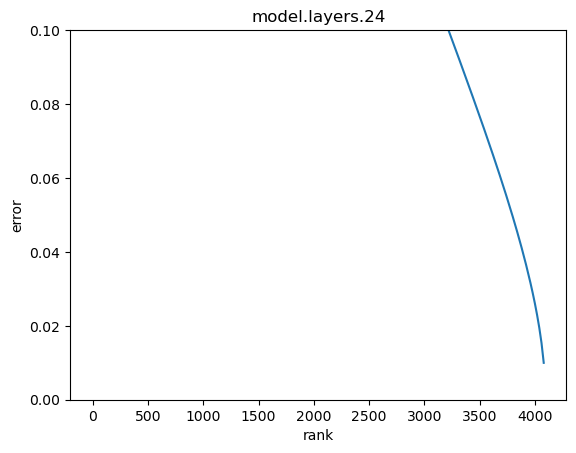

2024-08-15 13:58:23 __main__ INFO     layer_name='model.layers.25'


100%|██████████| 400/400 [00:10<00:00, 38.37it/s]


2024-08-15 13:58:33 __main__ INFO     torch.Size([4096, 5679])


100%|██████████| 435/435 [00:06<00:00, 71.49it/s] 


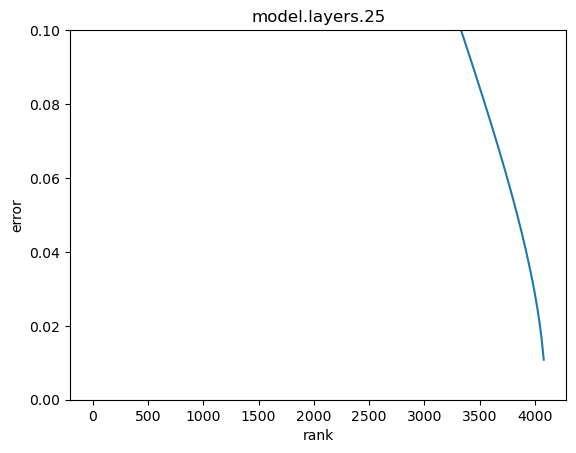

2024-08-15 13:58:43 __main__ INFO     layer_name='model.layers.26'


100%|██████████| 400/400 [00:10<00:00, 38.91it/s]

2024-08-15 13:58:53 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.22it/s] 


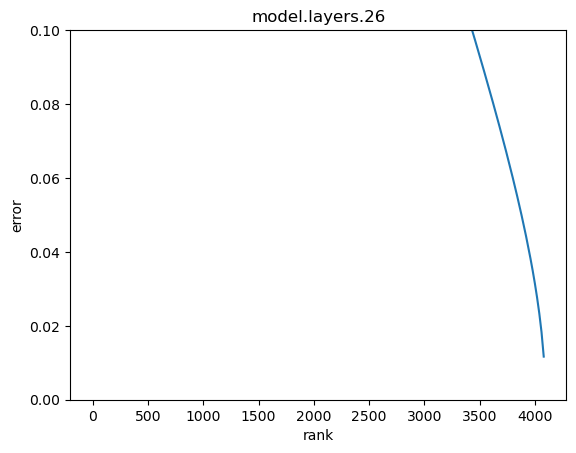

2024-08-15 13:59:02 __main__ INFO     layer_name='model.layers.27'


100%|██████████| 400/400 [00:10<00:00, 39.31it/s]

2024-08-15 13:59:13 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.10it/s] 


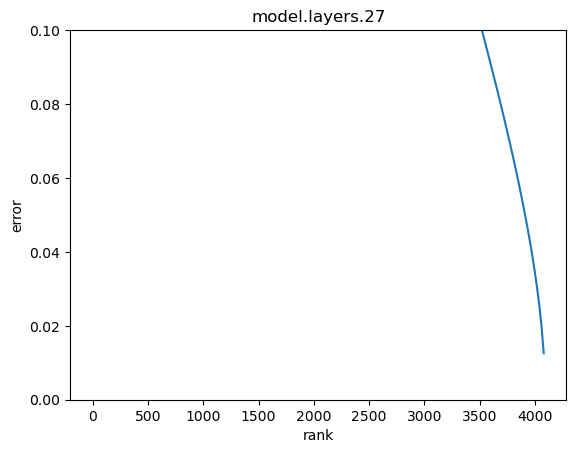

2024-08-15 13:59:22 __main__ INFO     layer_name='model.layers.28'


100%|██████████| 400/400 [00:10<00:00, 39.15it/s]

2024-08-15 13:59:32 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.27it/s] 


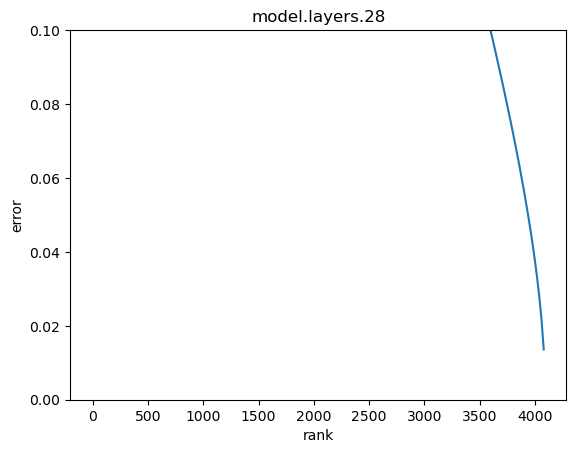

2024-08-15 13:59:42 __main__ INFO     layer_name='model.layers.29'


100%|██████████| 400/400 [00:10<00:00, 39.20it/s]

2024-08-15 13:59:52 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.29it/s] 


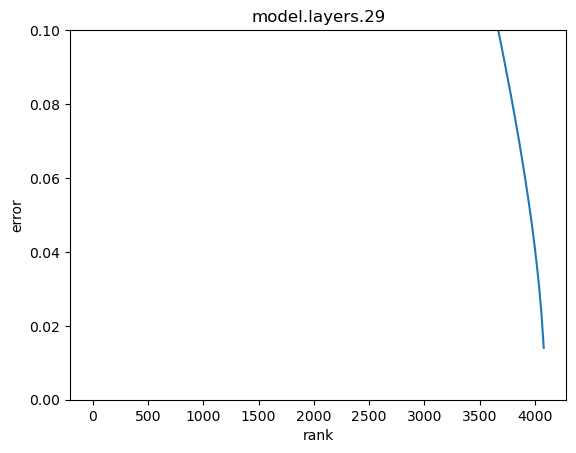

2024-08-15 14:00:01 __main__ INFO     layer_name='model.layers.30'


100%|██████████| 400/400 [00:10<00:00, 39.56it/s]

2024-08-15 14:00:11 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.22it/s] 


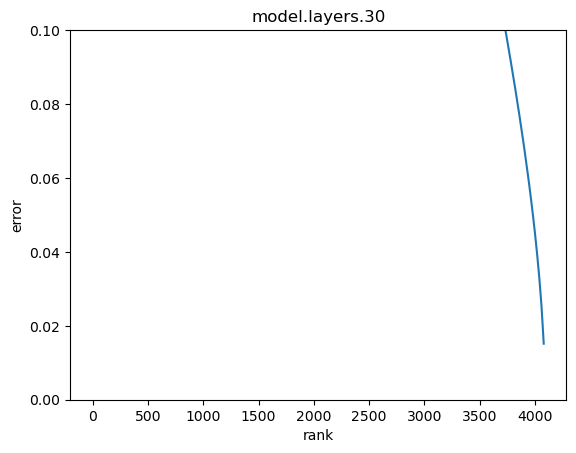

2024-08-15 14:00:21 __main__ INFO     layer_name='model.layers.31'


100%|██████████| 400/400 [00:10<00:00, 39.74it/s]

2024-08-15 14:00:31 __main__ INFO     torch.Size([4096, 5679])



100%|██████████| 435/435 [00:06<00:00, 72.00it/s] 


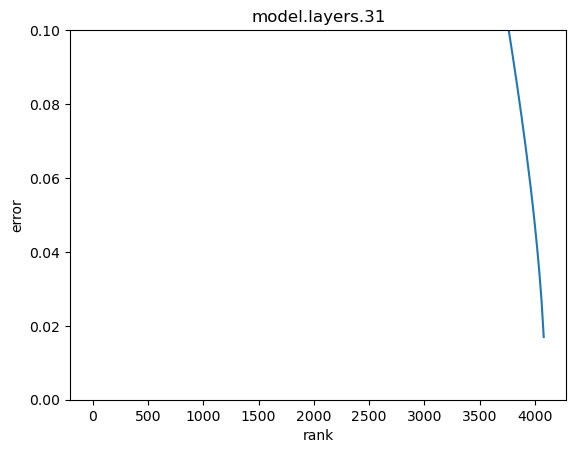

In [54]:
import numpy as np
from src.utils import experiment_utils
import matplotlib.pyplot as plt
from src.functional import free_gpu_cache

experiment_utils.set_seed(123)

cache_dir = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "cache_states",
)

layer_name_format = "model.layers.{}"
n_layer = 32

for l_idx in range(n_layer):

    layer_name = layer_name_format.format(l_idx)
    logger.info(f"{layer_name=}")

    all_states = None
    for cache_file in tqdm(os.listdir(cache_dir)):
        if cache_file.endswith(".npz"):
            caches = np.load(os.path.join(cache_dir, cache_file))[layer_name][0] # [1, n_seq, dim]
            if all_states is None:
                all_states = caches
            else:
                all_states = np.concatenate([all_states, caches], axis=0)

    all_states = torch.Tensor(all_states).T.cuda()
    logger.info(all_state.shape)

    U, S, Vh = torch.linalg.svd(all_states, full_matrices=False)

    ranks = []
    dists = []

    resolutions = list(range(100)) + list(range(100, 1000, 5)) + list(range(1000, S.shape[0], 20))
    for rank in tqdm(resolutions):
        ranks.append(rank)
        M = U[:, :rank] @ torch.diag(S[:rank]) @ Vh[:rank, :]
        dists.append((torch.norm(all_states - M) / all_state.norm()).item())

    plt.plot(ranks, dists)
    plt.xlabel("rank")
    plt.ylabel("error")
    plt.title(f"{layer_name}")

    plt.ylim(0, 0.1)

    plt.show()

    free_gpu_cache()
    